The price of bread is ~1\$ and gets you ~2500 calories that's ~2kWh/\$  
Coal can produce MWh in the price of ~100\$, that's 10kWh/\$  
That's not a big difference actually.  

But food is not the main expense  
The main expense is the house  

What now?
It's pretty difficult to write hebrew with latin characters.
But I guess I can try

In [26]:
money_to_freedom = 375000
money_per_year = 50000
years_to_freedom = money_to_freedom/money_per_year
months_to_freedom = years_to_freedom*12
years_to_freedom


7.5

In [15]:
money_per_day = money_per_month/20
money_per_hour = money_per_day/10
money_per_hour

20.0

I need this freedom...
That's all I care about...
How do I get there faster?  
I can work as an uber driver, get ~8000$ for 200 hour so ~40$/hr  
Out of which I keep ~25$  
If I work another 40 hours a month, I take it down to 6.25 years


If I earn 6% interest a year
year_1 = 50000
year_2 = year1\*1.06+50000
year_N = year_N-1\*1.06 + 50000 = sum(year_1\*1.06\*\*i) = year_1\*sum(1.06\*\*i)=year_1\*(1.06\*\*i-1)/(1.06-1)

In [43]:
def year(n, i=1.06, s=50000): return s * (i**(n+1)-1)/(i-1)
year(5.4)

376641.37259596353

If I need t\$ a year to retire, and I save s\$ every year, and I get i% on my money  
The sum I need to reach T = t/(i-1)  
And the sum each year is s \* (i\*\*N-1)/(i-1)  
If I want them to be equal  
t/s=(i\*\*N-1)  
t/s+1 = i\*\*N  
log(t/s+1) = N\*log(i)  
N = log(t/s+1)/log(i)

In [39]:
import numpy as np
def years(tts, i, stt0=None, out=float): return out(np.log(tts+1)/np.log(i+1) - years(stt0*i, i, out=out))\
                                                if stt0 else out(np.log(tts+1)/np.log(i+1))
def total(n, s, i): s*((1+i)**n-1)/i
years(1, .08)
years(1, .08, 125/50)

6.63745729300159

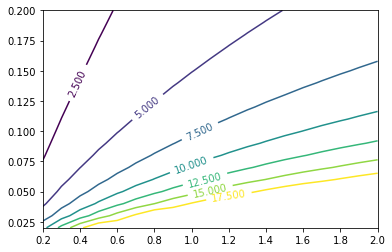

In [36]:
import matplotlib.pyplot as plt
x = np.array([tts/10 for tts in range(20,1,-1)])
y = np.array([i/100 for i in np.arange(20, 1, -1)])
a = np.array([[years(tts, i) for tts in x] for i in y])
MAX_YEARS = 20
a[a > MAX_YEARS] = MAX_YEARS
CS = plt.contour(x, y, a)
plt.clabel(CS, inline=1, fontsize=10)
# plt.matshow(a, interpolation='nearest')#, extent=[1, 20, 1, 20])
# plt.xticks(range(1,20), [tts/10 for tts in range(20,1,-1)])
# plt.yticks(range(1,20), [i/100 for i in range(20,1,-1)])
# plt.yticks(range(1,20), 'i')
plt.show()

1.0 0.0
1.1 0.09531017980432493
1.2 0.1823215567939546
1.3 0.26236426446749106
1.4 0.3364722366212129
1.5 0.4054651081081644
1.6 0.47000362924573563
1.7 0.5306282510621704
1.8 0.5877866649021191
1.9 0.6418538861723947
2.0 0.6931471805599453
2.1 0.7419373447293773
2.2 0.7884573603642703
2.3 0.8329091229351039
2.4 0.8754687373538999
2.5 0.9162907318741551
2.6 0.9555114450274363
2.7 0.9932517730102834
2.8 1.0296194171811581
2.9 1.0647107369924282


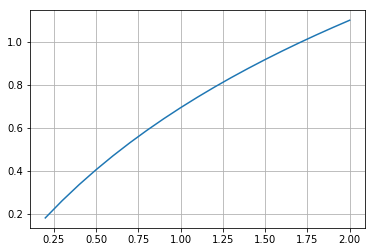

In [49]:
a1 = [np.log(1+tts) for tts in x]
plt.plot(x, a1)
plt.grid(True)
plt.show()

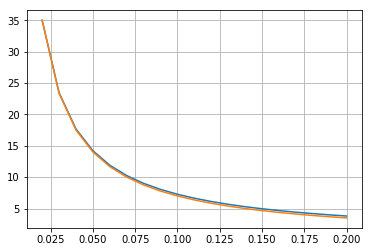

In [47]:
a = np.array([years(1, i) for i in y])
a2 = np.array([0.7/i for i in y])
plt.plot(y, a)
plt.plot(y, a2)
plt.grid(True)
plt.show()